In [1]:
#Importing basic packages for creating arrays & plotting graph

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Loading the Data Set
house_price=pd.read_csv("train.csv")

In [3]:
house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#Setting the style for the graph
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

Text(0.5, 1.0, 'Before removing outliers')

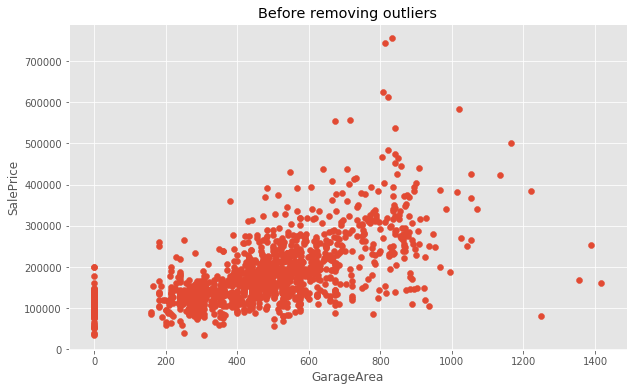

In [5]:
#Plotting the scatter plot & labeling x,y and title
plt.scatter(house_price["GarageArea"],house_price["SalePrice"])
plt.xlabel("GarageArea")
plt.ylabel("SalePrice")
plt.title("Before removing outliers")

In [6]:
#descriging the datatypes of the columns
house_price.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [7]:
"""
As there is categorical type columns too,creating separate dataframe(with required columns) as z-score can't be applied on the categorical columns.
"""

"\nAs there is categorical type columns too,creating separate dataframe(with required columns) as z-score can't be applied on the categorical columns.\n"

In [8]:
df=pd.DataFrame([house_price["GarageArea"],house_price["SalePrice"]])

In [9]:
df

,0,1,2,3,4,5,6,7,8,9,...,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459
GarageArea,548,460,608,642,836,480,636,484,468,205,...,0,840,525,0,400,460,500,252,240,276
SalePrice,208500,181500,223500,140000,250000,143000,307000,200000,129900,118000,...,136000,287090,145000,84500,185000,175000,210000,266500,142125,147500


In [10]:
df=df.transpose()

In [11]:
df

,GarageArea,SalePrice
0,548,208500
1,460,181500
2,608,223500
3,642,140000
4,836,250000
...,...,...
1455,460,175000
1456,500,210000
1457,252,266500
1458,240,142125


In [12]:
df.isna().sum()

GarageArea    0
SalePrice     0
dtype: int64

In [13]:
#Removing the outlier data using the z-score

from scipy import stats

"""
 Z-score is measured in terms of standard deviations from the mean. If a Z-score is 0, it indicates that the data point's score is identical to the mean score. A Z-score of 1.0 would indicate a value that is one standard deviation from the mean. Z-scores may be positive or negative, with a positive value indicating the score is above the mean and a negative score indicating it is below the mean.
"""

z = np.abs(stats.zscore(df))
z

array([[0.35100032, 0.34727322],
       [0.06073101, 0.00728832],
       [0.63172623, 0.53615372],
       ...,
       [1.03391416, 1.07761115],
       [1.09005935, 0.48852299],
       [0.9216238 , 0.42084081]])

In [14]:
#let us consider threshold is 3

# we shall remove all the points which are 3 units away standard deviation from the mean 
np.where(z < 3)

(array([   0,    0,    1, ..., 1458, 1459, 1459], dtype=int64),
 array([0, 1, 0, ..., 1, 0, 1], dtype=int64))

In [15]:
#Filtering the Dataframe with the values which are 3 units away standard deviation from the mean
filtered_entries = df[(z < 3).all(axis=1)]

Text(0.5, 1.0, 'After removing outliers')

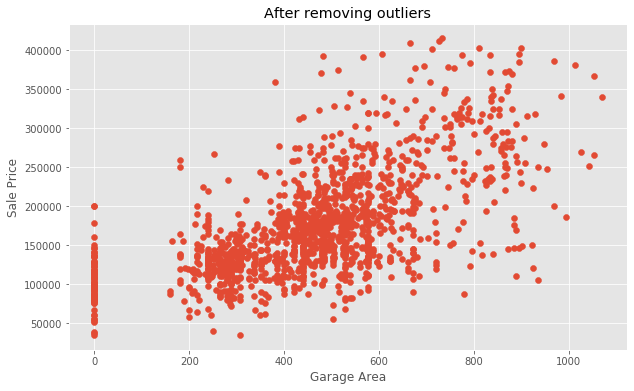

In [16]:
#plotting the scatter plot with the filtered dataframe & labeling x,y and title
plt.scatter(filtered_entries["GarageArea"],filtered_entries["SalePrice"])
plt.xlabel('Garage Area')
plt.ylabel('Sale Price')
plt.title('After removing outliers')